## Identifying value of Brazilian Real coins by image using Convolutional Neural Networks (CNN)

This project used the dataset from Kaggle: Brazilian Coins - Classification set. https://www.kaggle.com/lgmoneda/br-coins

To fit the dataset to this code I separated the images randomly into two folders (training set and test set) and inside each folder, I separated it by value, keeping 2500 images on training set (500 each category) and 500 for test set (100 each category).

The configuration of this CNN is:
- Convolutional input Layer with 32 5x5 feature maps in rectifier activation function.
- Max Pool layer of 2x2
- Convolutional input Layer with 32 3x3 feature maps in rectifier activation function.
- Max Pool layer of 2x2
- Convolutional input Layer with 64 3x3 feature maps in rectifier activation function.
- Max Pool layer of 2x2
- Convolutional input Layer with 64 3x3 feature maps in rectifier activation function.
- Max Pool layer of 2x2
- Dropout set to 20%
- Fully connected layer with 128 units and rectifier activation function
- Fully connected output layer 5 units and a softmax activation function.
- Learning rate of 0.001
- Optimizer = "Adam"

The results as we will see are acceptable. Tuning (adding more layers or changing hyperparameters) better this model can definitely improve the results.

### Building the CNN

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import os
import keras



Using TensorFlow backend.


### Initializing the CNN

In [2]:
classifier = Sequential()

In [3]:
# Creating Convolution layer
classifier.add(Conv2D(32, (5, 5), input_shape = (64, 64, 3), activation = 'relu'))

# Applying Pooling 
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding dropout
classifier.add(Dropout(0.2))

# Flattening
classifier.add(Flatten())

### Connecting everything and compiling

In [4]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 5, activation = 'softmax'))

In [5]:
# Compiling the CNN
optimizer = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
classifier.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


### Training model

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('moedas/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory('moedas/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [12]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 78,
                         epochs = 30,
                         validation_data = test_set,
                         validation_steps = 15)

Epoch 1/30
78/78 [==============================] - 62s - loss: 1.6104 - acc: 0.1959 - val_loss: 1.6090 - val_acc: 0.1896
Epoch 2/30
78/78 [==============================] - 49s - loss: 1.6085 - acc: 0.2088 - val_loss: 1.6076 - val_acc: 0.2042
Epoch 3/30
78/78 [==============================] - 47s - loss: 1.6061 - acc: 0.2300 - val_loss: 1.6037 - val_acc: 0.2812
Epoch 4/30
78/78 [==============================] - 46s - loss: 1.5878 - acc: 0.2913 - val_loss: 1.5712 - val_acc: 0.3104
Epoch 5/30
78/78 [==============================] - 49s - loss: 1.4902 - acc: 0.3518 - val_loss: 1.5111 - val_acc: 0.3375
Epoch 6/30
78/78 [==============================] - 51s - loss: 1.3545 - acc: 0.4046 - val_loss: 1.5200 - val_acc: 0.4021
Epoch 7/30
78/78 [==============================] - 49s - loss: 1.2752 - acc: 0.4596 - val_loss: 1.5428 - val_acc: 0.4396
Epoch 8/30
78/78 [==============================] - 47s - loss: 1.2127 - acc: 0.4803 - val_loss: 1.5967 - val_acc: 0.4250
Epoch 9/30
78/78 [======

### Evaluating model

In [13]:
classifier.evaluate_generator(test_set, steps = 32)

[1.3893202979564667, 0.66199999928474429]

We got 66% of correct predictions with this model. Considering the not so good conditions of the images on training set, it is an acceptable prediction rate.

### Visualizing results

The classes are:

In [16]:
training_set.class_indices

{'cinco': 0, 'cinquenta': 1, 'dez': 2, 'um': 3, 'vintecinco': 4}

#### Let's check the results with some pictures. First 25 cents.

In [23]:
from keras.preprocessing import image
import numpy as np
test_image = image.load_img('moedas/test_set/vintecinco/25_1477287192.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict_classes(test_image)
result

1/1 [==============================] - 0s


array([4])

#### The prediction is correct!

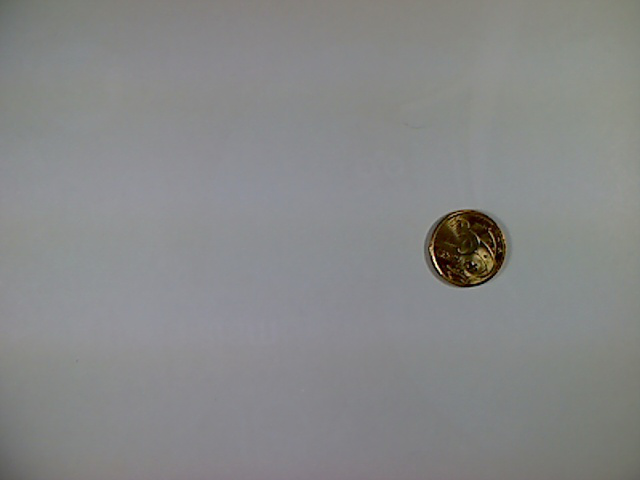

In [25]:
image.load_img('moedas/test_set/vintecinco/25_1477287192.jpg')

Now, let's test with 50 cents coin.

In [35]:
test_image = image.load_img('moedas/test_set/cinquenta/50_1477283454.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict_classes(test_image)
result

1/1 [==============================] - 0s


array([3])

#### Wrong prediction :( 

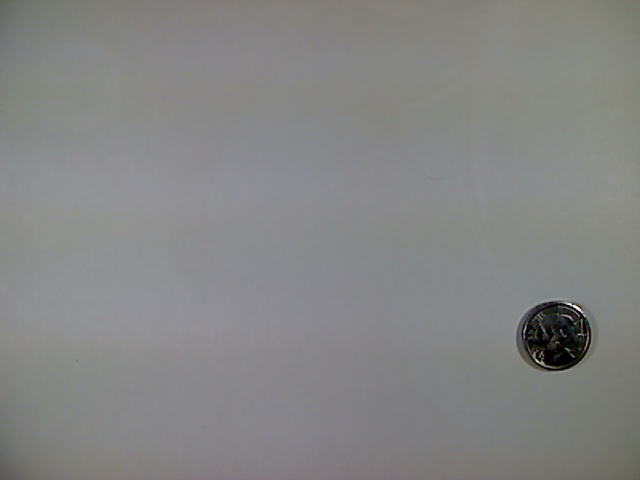

In [36]:
image.load_img('moedas/test_set/cinquenta/50_1477283454.jpg')

Now with coins in different scenario than training set. Let's check 1 real coin.

In [37]:
test_image = image.load_img('moedas/moeda100.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict_classes(test_image)
result

1/1 [==============================] - 0s


array([3])

### Perfect!

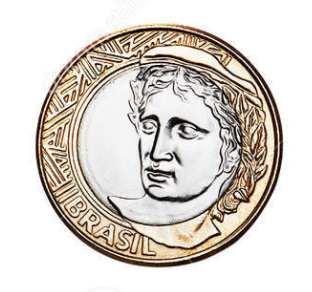

In [43]:
image.load_img('moedas/moeda100.jpg')

In [49]:
test_image = image.load_img('moedas/moeda010.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict_classes(test_image)
result

1/1 [==============================] - 0s


array([4])

### Not a good job with 10 cents. It predict as 25 cents. At least, the collor of 25 cents and 10 cents are very close to each other, sometimes confusing it. 

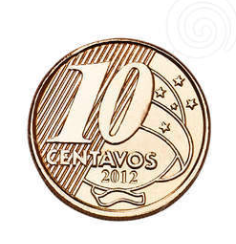

In [50]:
image.load_img('moedas/moeda010.jpg')

#### Just a test with one dollar coin. It looks like a 25 cents BRL coin (color and size)

In [70]:
test_image = image.load_img('moedas/one.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict_classes(test_image)
result

1/1 [==============================] - 0s


array([4])

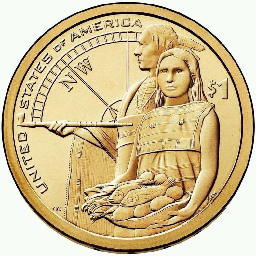

In [72]:
image.load_img('moedas/one.jpeg', target_size= (256, 256))

### Saving model

In [73]:
# serialize model to JSON
model_json = classifier.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model_final.h5")
print("Saved model to disk")